# Code for Course D212 - Data Mining II, Task2.


In [14]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

In [15]:
# Read data file
itemsets = pd.read_csv('teleco_market_basket.csv')
itemsets

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,Item11,Item12,Item13,Item14,Item15,Item16,Item17,Item18,Item19,Item20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,YUNSONG 3pack 6ft Nylon Lightning Cable,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,Falcon Dust Off Compressed Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14999,HP 63XL Ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Convert file data to data frame
itemsets.dropna(subset = ["Item01"], inplace=True)
itemsets = itemsets.T.apply(lambda x: x.dropna().tolist()).tolist()
itemsets

[['Logitech M510 Wireless mouse',
  'HP 63 Ink',
  'HP 65 ink',
  'nonda USB C to USB Adapter',
  '10ft iPHone Charger Cable',
  'HP 902XL ink',
  'Creative Pebble 2.0 Speakers',
  'Cleaning Gel Universal Dust Cleaner',
  'Micro Center 32GB Memory card',
  'YUNSONG 3pack 6ft Nylon Lightning Cable',
  'TopMate C5 Laptop Cooler pad',
  'Apple USB-C Charger cable',
  'HyperX Cloud Stinger Headset',
  'TONOR USB Gaming Microphone',
  'Dust-Off Compressed Gas 2 pack',
  '3A USB Type C Cable 3 pack 6FT',
  'HOVAMP iPhone charger',
  'SanDisk Ultra 128GB card',
  'FEEL2NICE 5 pack 10ft Lighning cable',
  'FEIYOLD Blue light Blocking Glasses'],
 ['Apple Lightning to Digital AV Adapter',
  'TP-Link AC1750 Smart WiFi Router',
  'Apple Pencil'],
 ['UNEN Mfi Certified 5-pack Lightning Cable'],
 ['Cat8 Ethernet Cable', 'HP 65 ink'],
 ['Dust-Off Compressed Gas 2 pack',
  'Screen Mom Screen Cleaner kit',
  'Moread HDMI to VGA Adapter',
  'HP 62XL Tri-Color ink',
  'Apple USB-C Charger cable'],
 ['Top

In [17]:
# One hot encoding to create True/False value matrix for each transaction and products
encoder = TransactionEncoder()
onehot = encoder.fit(itemsets).transform(itemsets)
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
onehot.to_csv('onehot.csv')

In [18]:
# Run apriori algorithm
frequent_itemsets = apriori(onehot, use_colnames= True, min_support = 0.001, max_len = 3)


In [19]:
# Create and display association rules
rules = association_rules(frequent_itemsets)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(VicTsing Wireless mouse, 10ft iPHone Charger ...",(Dust-Off Compressed Gas 2 pack),0.002000,0.238368,0.001866,0.933333,3.915511,0.001390,11.424477
1,"(5pack Nylon Braided USB C cables, iPhone 11 c...",(HP 63XL Ink),0.002666,0.079323,0.002533,0.950000,11.976387,0.002321,18.413545
2,"(Anker 2-in-1 USB Card Reader, Cat8 Ethernet C...",(Dust-Off Compressed Gas 2 pack),0.001733,0.238368,0.001466,0.846154,3.549776,0.001053,4.950607
3,"(TP-Link AC1750 Smart WiFi Router, Anker 2-in-...",(Screen Mom Screen Cleaner kit),0.001600,0.129583,0.001333,0.833333,6.430898,0.001126,5.222504
4,"(Falcon Dust Off Compressed Gas, Brother Genui...",(VIVO Dual LCD Monitor Desk mount),0.001466,0.174110,0.001200,0.818182,4.699220,0.000945,4.542394
5,"(Cat8 Ethernet Cable, SanDisk Extreme 256GB card)",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
6,"(FEEL2NICE 5 pack 10ft Lighning cable, SanDisk...",(Dust-Off Compressed Gas 2 pack),0.001200,0.238368,0.001067,0.888889,3.729058,0.000781,6.854686
7,"(SanDisk Ultra 400GB card, Premium Nylon USB C...",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
8,"(SanDisk Extreme 256GB card, SanDisk Ultra 64G...",(Dust-Off Compressed Gas 2 pack),0.001866,0.238368,0.001600,0.857143,3.595877,0.001155,5.331422
9,"(Screen Mom Screen Cleaner kit, iPhone 11 case)",(Logitech M510 Wireless mouse),0.001866,0.071457,0.001600,0.857143,11.995203,0.001466,6.499800


In [20]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
26,0.238368,(Dust-Off Compressed Gas 2 pack)
12,0.179709,(Apple Pencil)
99,0.174110,(VIVO Dual LCD Monitor Desk mount)
95,0.170911,(USB 2.0 Printer cable)
34,0.163845,(HP 61 ink)
...,...,...
2448,0.001067,"(Nylon Braided Lightning to USB cable, USB 2.0..."
2447,0.001067,"(Nylon Braided Lightning to USB cable, 3A USB ..."
4722,0.001067,"(Nylon Braided Lightning to USB cable, HP 61 i..."
2441,0.001067,"(Logitech M510 Wireless mouse, SanDisk Ultra 1..."


In [21]:
frequent_itemsets[frequent_itemsets['support']>frequent_itemsets.support.nlargest(5).min()]

,support,itemsets
12,0.179709,(Apple Pencil)
26,0.238368,(Dust-Off Compressed Gas 2 pack)
95,0.170911,(USB 2.0 Printer cable)
99,0.174110,(VIVO Dual LCD Monitor Desk mount)


In [22]:
rules = association_rules(frequent_itemsets)


In [23]:
rules.sort_values('consequent support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(VicTsing Wireless mouse, 10ft iPHone Charger ...",(Dust-Off Compressed Gas 2 pack),0.002000,0.238368,0.001866,0.933333,3.915511,0.001390,11.424477
2,"(Anker 2-in-1 USB Card Reader, Cat8 Ethernet C...",(Dust-Off Compressed Gas 2 pack),0.001733,0.238368,0.001466,0.846154,3.549776,0.001053,4.950607
5,"(Cat8 Ethernet Cable, SanDisk Extreme 256GB card)",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
6,"(FEEL2NICE 5 pack 10ft Lighning cable, SanDisk...",(Dust-Off Compressed Gas 2 pack),0.001200,0.238368,0.001067,0.888889,3.729058,0.000781,6.854686
7,"(SanDisk Ultra 400GB card, Premium Nylon USB C...",(Dust-Off Compressed Gas 2 pack),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
8,"(SanDisk Extreme 256GB card, SanDisk Ultra 64G...",(Dust-Off Compressed Gas 2 pack),0.001866,0.238368,0.001600,0.857143,3.595877,0.001155,5.331422
4,"(Falcon Dust Off Compressed Gas, Brother Genui...",(VIVO Dual LCD Monitor Desk mount),0.001466,0.174110,0.001200,0.818182,4.699220,0.000945,4.542394
11,"(SanDisk 128GB card, Stylus Pen for iPad)",(VIVO Dual LCD Monitor Desk mount),0.002133,0.174110,0.001733,0.812500,4.666587,0.001362,4.404746
3,"(TP-Link AC1750 Smart WiFi Router, Anker 2-in-...",(Screen Mom Screen Cleaner kit),0.001600,0.129583,0.001333,0.833333,6.430898,0.001126,5.222504
10,"(SanDisk Ultra 128GB card, SAMSUNG 128GB card)",(Screen Mom Screen Cleaner kit),0.001466,0.129583,0.001200,0.818182,6.313973,0.001010,4.787295


In [24]:
rules.to_csv('rules1')

In [25]:
print(rules['antecedent support'].min(), rules['antecedent support'].max())
print(rules['consequent support'].min(), rules['consequent support'].max())
print(rules['confidence'].min(), rules['confidence'].max())
print(rules['lift'].min(), rules['lift'].max())


0.0011998400213304892 0.0026663111585121984
0.07145713904812692 0.23836821757099053
0.8125 0.95
3.4324283099450885 11.995202558635395


<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

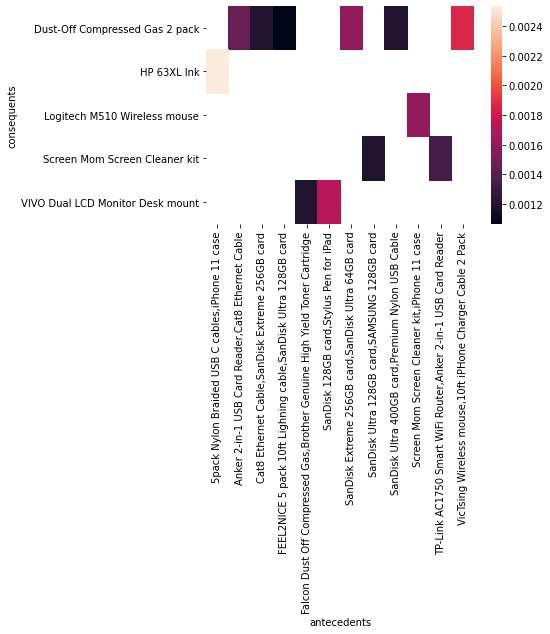

In [26]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)